Raditya Aji Sasmoyo (2010631170111)

1. Case tsb termasuk supervised classification atau regression ? Jelaskan mengapa? Supervised classification karena dataset berupa kategorikal dan numerikal, target kolom 'Churn' berupa 0 dan 1.
2. Dari matric berikut [RMSE/MAPE/Accuracy/Precision/Recall/Specificity], manakah yang paling sesuai digunakan untuk evaluasi performance Machine Learning ? Jelaskan mengapa? Matric Recall sesuai karena data imbalance

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/raditya2010631170111/df_20111/main/dataset_customer_churn_prediction.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C. Phyton

a. Feature engineering

1. Handle Missing value 

In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

Tidak terdapat missing value

2. Outlier

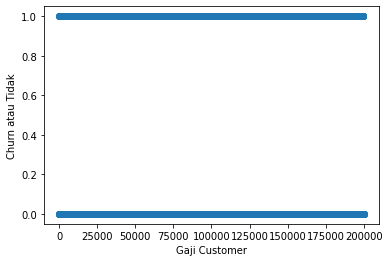

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['EstimatedSalary'], df['Churn'])
plt.xlabel('Gaji Customer')
plt.ylabel('Churn atau Tidak')
plt.show()

Tidak terdapat Outlier

3. Drop Unused Kolom

In [ ]:
del df ['Surname']

4. Scatter

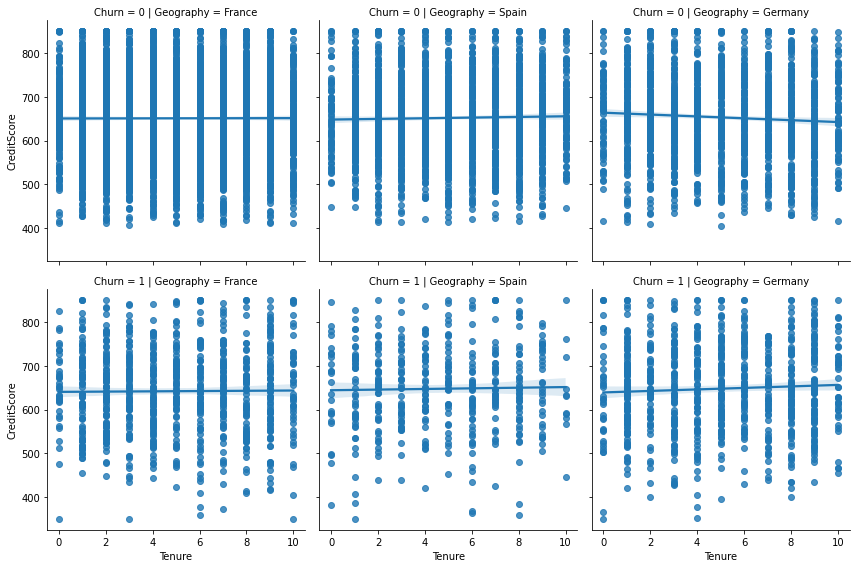

In [ ]:
import seaborn as sns
sns.lmplot(
    data=df, x="Tenure", y="CreditScore",
    col="Geography", row="Churn", height=4,
)

5. Encoding (mengubah fitur kategorikal menjadi numerikal)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder
encoder_1 = TargetEncoder()
df['Geography'] = encoder_1.fit_transform(df['Geography'], df['Churn'])
encoder_2 = TargetEncoder()
df['Gender'] = encoder_2.fit_transform(df['Gender'], df['Churn'])
df.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,15634602,619,0.161548,0.250715,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,0.166734,0.250715,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0.161548,0.250715,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0.161548,0.250715,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,0.166734,0.250715,43,2,125510.82,1,1,1,79084.10,0


b. Feature Selection

1. Normalization (fitur=Churn)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
exclude = ['Surname', 'CreditScore', 'Geography', 'Gender', 'Churn']
for i in df.columns:
  if i not in exclude:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,0.275616,619,0.161548,0.250715,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,0.326454,608,0.166734,0.250715,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,0.214421,502,0.161548,0.250715,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,0.542636,699,0.161548,0.250715,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,0.688778,850,0.166734,0.250715,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


Churn hanya 0 atau 1 = bkn Correlation tapi C-Square

2. Correlation

In [ ]:
df.corr()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CustomerId,1.000000,0.005308,-0.002879,0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,0.005747,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.002879,0.005747,1.000000,0.024338,0.047320,-0.000449,0.400873,-0.010236,0.010253,-0.020158,0.010194,0.173567
Gender,0.002641,0.002857,0.024338,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
Age,0.009497,-0.003965,0.047320,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.000449,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.400873,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.010236,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,0.010253,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,-0.020158,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128


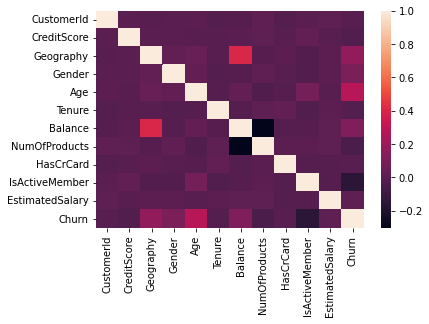

In [ ]:
sns.heatmap(df.corr())
plt.show()

3. Model & Membagi data latih-uji

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df.drop('Churn', axis=1)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4)

c. Create Machine learning at least using 2 algorithm & evaluate model performance (up to you what algorithm to choose)

1. Modeling

1.1 Algoritma Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_1, y_train_1)
y_pred_1 = model.predict(X_test_1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train_2)
model_2.score(X_test_2, y_test_2)
y_pred_2 = model.predict(X_test_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.1.1 Evaluate Model Performance dengan Confusion Matrix

1.1.1.1 model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test_1, y_pred_1)

array([[2303,   90],
       [ 486,  121]])

In [ ]:
a_1 = classification_report(y_test_1, y_pred_1)
print(a_1)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2393
           1       0.57      0.20      0.30       607

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.77      0.81      0.77      3000



1.1.1.2 model_2

In [ ]:
confusion_matrix(y_test_2, y_pred_2)

array([[3121,  101],
       [ 623,  155]])

In [ ]:
a_2 = classification_report(y_test_2, y_pred_2)
print(a_2)

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      3222
           1       0.61      0.20      0.30       778

    accuracy                           0.82      4000
   macro avg       0.72      0.58      0.60      4000
weighted avg       0.79      0.82      0.78      4000



Berdasarkan hasil accuracy 0.80 = model overfit

1.2 Algoritma K-Nearest Neighbors

1.2.1 Model & Membagi data latih-uji

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.20)

1.2.2 Standardisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train_3)
X_train_3 = scaler.transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier (n_neighbors=4)
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)
y_pred_3
model_3.predict_proba(X_test_3)

array([[0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ],
       ...,
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.75, 0.25]])

1.2.2 Confusion Matrix ke Model 3

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_3, y_pred_3))

[[1506   57]
 [ 322  115]]


In [ ]:
print(classification_report(y_test_3, y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1563
           1       0.67      0.26      0.38       437

    accuracy                           0.81      2000
   macro avg       0.75      0.61      0.63      2000
weighted avg       0.79      0.81      0.78      2000



Hasil accuracy paling tinggi memakai algoritma KNN yaitu 0.83

d. Cross Validation dengan metode K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict 
model_3 = LogisticRegression() 
cv = KFold(n_splits=7)
scores = cross_val_score(model_3, X, y, cv=cv) 
print(scores)

In [ ]:
for train_index, test_index in cv.split(X): 
  print('TRAIN:', train_index, 'TEST:', test_index)

TRAIN: [1429 1430 1431 ... 9997 9998 9999] TEST: [   0    1    2 ... 1426 1427 1428]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [1429 1430 1431 ... 2855 2856 2857]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [2858 2859 2860 ... 4284 4285 4286]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [4287 4288 4289 ... 5713 5714 5715]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [5716 5717 5718 ... 7141 7142 7143]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [7144 7145 7146 ... 8569 8570 8571]
TRAIN: [   0    1    2 ... 8569 8570 8571] TEST: [8572 8573 8574 ... 9997 9998 9999]
